Todo:
- automatically add parameters and labels to plot
- use any way of plotting with matplotlib
- fig.update() replots all lines with updated values
- multiple figure support

- timer issues with multiprocessing

In [1]:
import squidpy
import pylab as pl
%matplotlib inline

mock1 = squidpy.Mock('mock1')
mock2 = squidpy.Mock('mock2')
instruments = squidpy.InstrumentList(mock1, mock2)

In [2]:
instruments

mock1,"['time', 'voltage', 'wave']"
mock2,"['time', 'voltage', 'wave']"


In [3]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments.all())
test.do(mock1.reset_timer)
test.watch(10)
test.run()

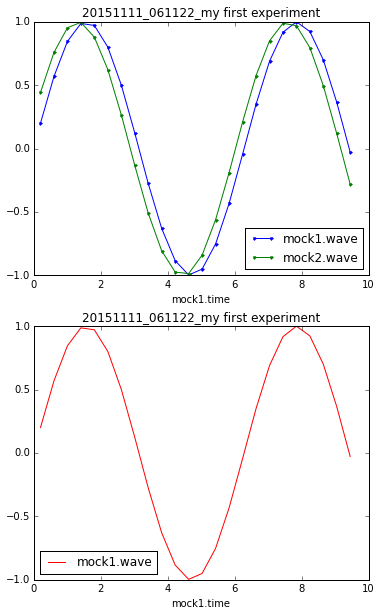

In [4]:
fig = pl.figure(figsize=(6,10))
ax1 = pl.subplot(211)
ax2 = pl.subplot(212)
test.data.plot('mock1.time',['mock1.wave','mock2.wave'],style='.-', ax=ax1)
test.data.plot('mock1.time',['mock1.wave'],style='r-', ax=ax2)
while test.running:
    test.data.update_plot()

In [ ]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments.all())

test.sweep(mock2,'voltage')[0:3:1]
test.sweep(mock1,'voltage')[0:0.3:.1]
test.measure()

mock1.reset_timer()
test.run()